<a href="https://colab.research.google.com/github/hrbolek/coronavirus/blob/master/czech_open_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Koronavirus v České republice
Výpočty s pomocí otevřených dat na platformě Jupyter s jazykem Python.


|Název|Odkaz|
|-|-|
|Otevřená data:|https://onemocneni-aktualne.mzcr.cz/api/v1/covid-19|
|Otevřená data svět|https://opendata.ecdc.europa.eu/covid19/casedistribution/json/|
|Opatření vlády ČR:|https://www.vlada.cz/cz/media-centrum/aktualne/aktualni-informace-ke-koronaviru-sars-cov-2-puvodne-2019-ncov-179250/|
|KHS JMK|https://www.khsbrno.cz/|

In [0]:
import matplotlib.pyplot as plt
import json
import requests
import pandas as pd
import numpy as np



In [0]:
urlHlaseni = 'https://onemocneni-aktualne.mzcr.cz/api/v1/covid-19/osoby.json'
responseHlaseni = requests.request("GET", urlHlaseni)
urlCumulative = 'https://onemocneni-aktualne.mzcr.cz/api/v1/covid-19/nakaza.json'
responseCumulative = requests.request("GET", urlCumulative)
urlTesty = 'https://onemocneni-aktualne.mzcr.cz/api/v1/covid-19/testy.json'
responseTesty = requests.request("GET", urlTesty)

In [0]:
plt.rcParams["figure.figsize"] = (21,14)

from functools import reduce
def countFromStr(series):
  numbers = series.astype(float).tolist()
  return reduce(lambda x, y: x + 1, numbers)

# Vývoj počtu nově nakažených

In [0]:
dataHlaseni = responseHlaseni.json()
dataCumulative = responseCumulative.json()
dataTesty = responseTesty.json()

In [0]:
#df = pd.DataFrame(data)
#display(df)
#df.groupby(['KHS']).count()
#display(df.groupby(['KHS']).count())
#df.pivot_table(values='Import', index=['Pohlavi', 'KHS'], columns=['ImportZemeCsuKod'], aggfunc=sumFromStr)
#df.pivot_table(values='Import', index=['DatumHlaseni'], columns=['KHS'], aggfunc=sumFromStr)

#df.groupby(['DatumHlaseni','Pohlavi']).size().unstack().plot(kind='bar',stacked=True)
#plt.grid(which='both')
#plt.show()

# Celkový vývoj počtu nakažených

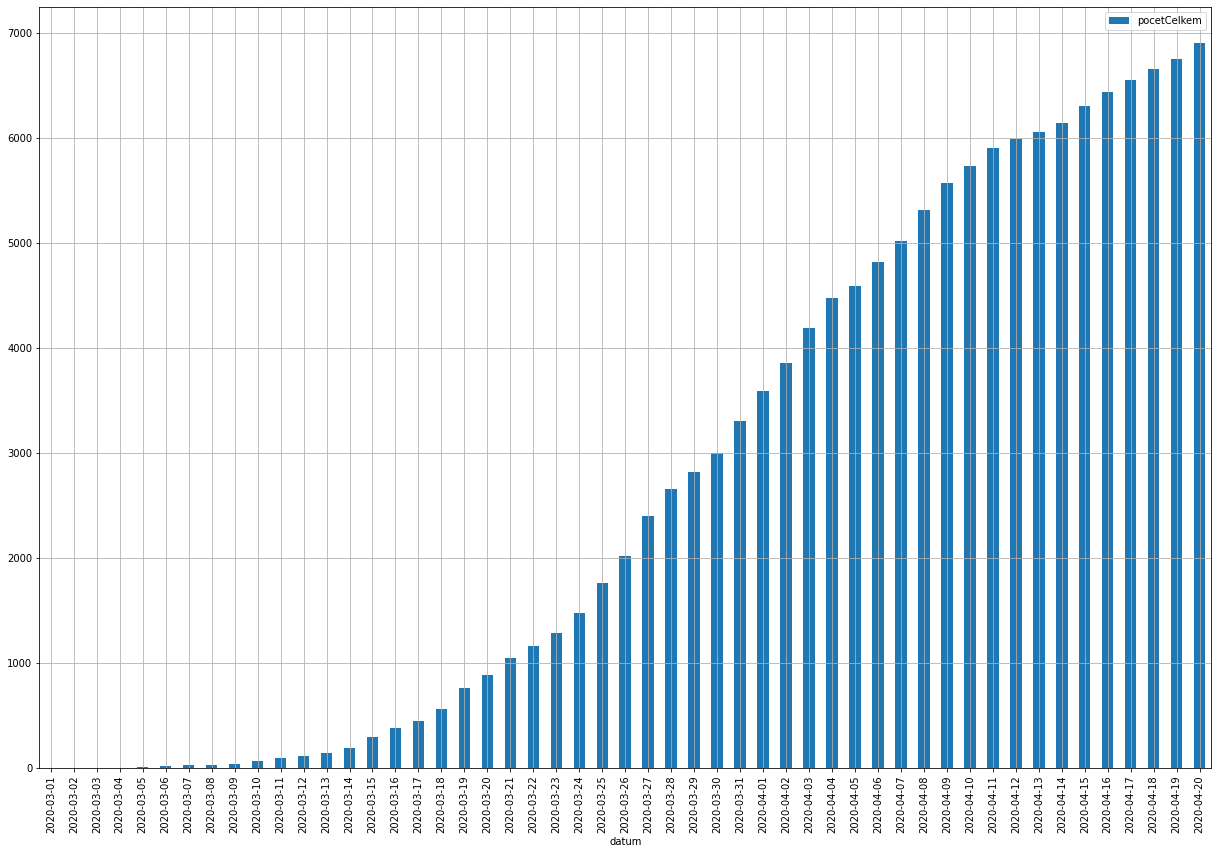

In [6]:
dfCumulative = pd.DataFrame(dataCumulative)
dfHlaseni = pd.DataFrame(dataHlaseni)
dfTesty = pd.DataFrame(dataTesty['data'])

def convertDate(gen):
  for item in gen:
    subitems = item.split('.')
    newitem = subitems[2] + '-' + '{:0>2}'.format(subitems[1]) + '-' + '{:0>2}'.format(subitems[0])
    yield newitem

dfTesty['datum_int'] = list(convertDate(dfTesty.datum))

dfCumulative[dfCumulative['pocetCelkem'] > 0].plot(kind='bar',x='datum',y='pocetCelkem')
#dfCumulative.plot(kind='bar',x='datum',y='pocetDen')
plt.grid(which='both')
plt.show()

# Denní přírůstek počtu nakažených

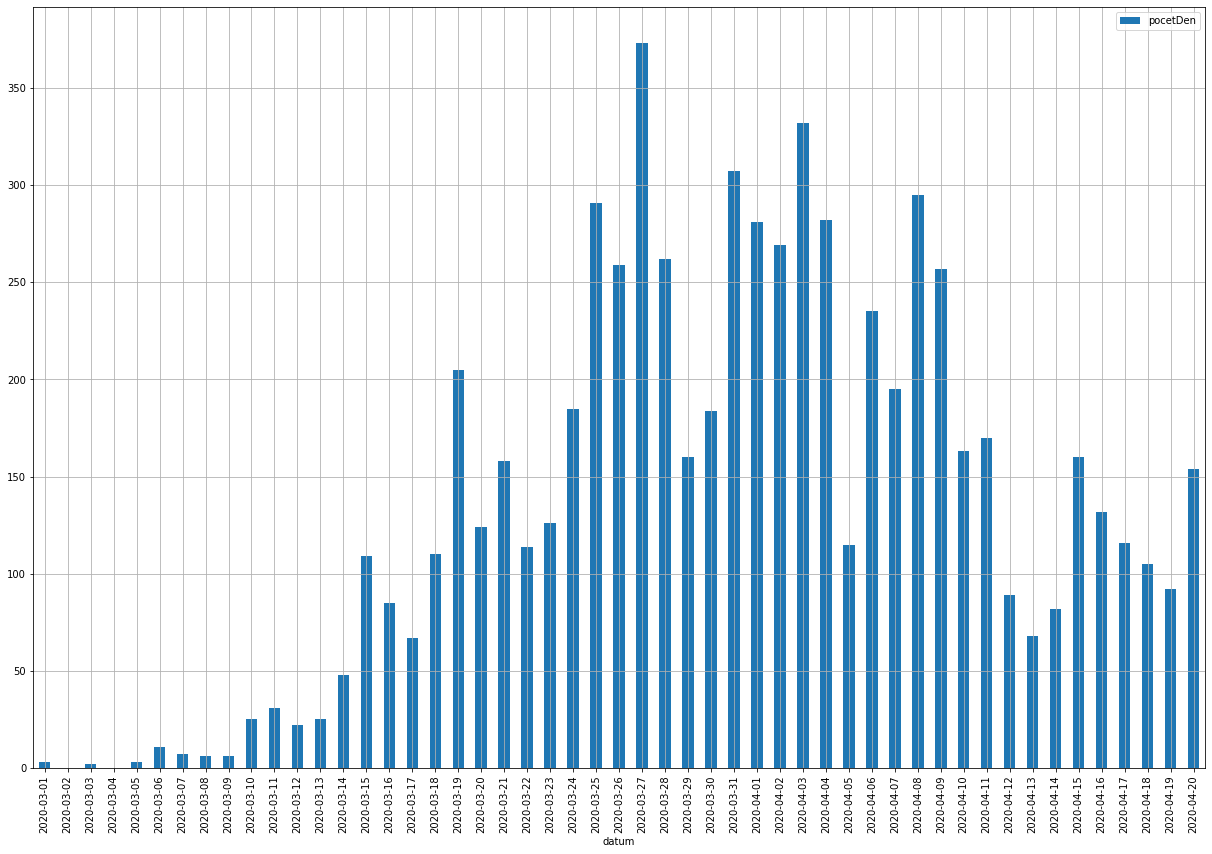

In [7]:
dfCumulative[dfCumulative['pocetCelkem'] > 0].plot(kind='bar',x='datum',y='pocetDen')
plt.grid(which='both')
plt.show()

# Procentulní denní přírůstek

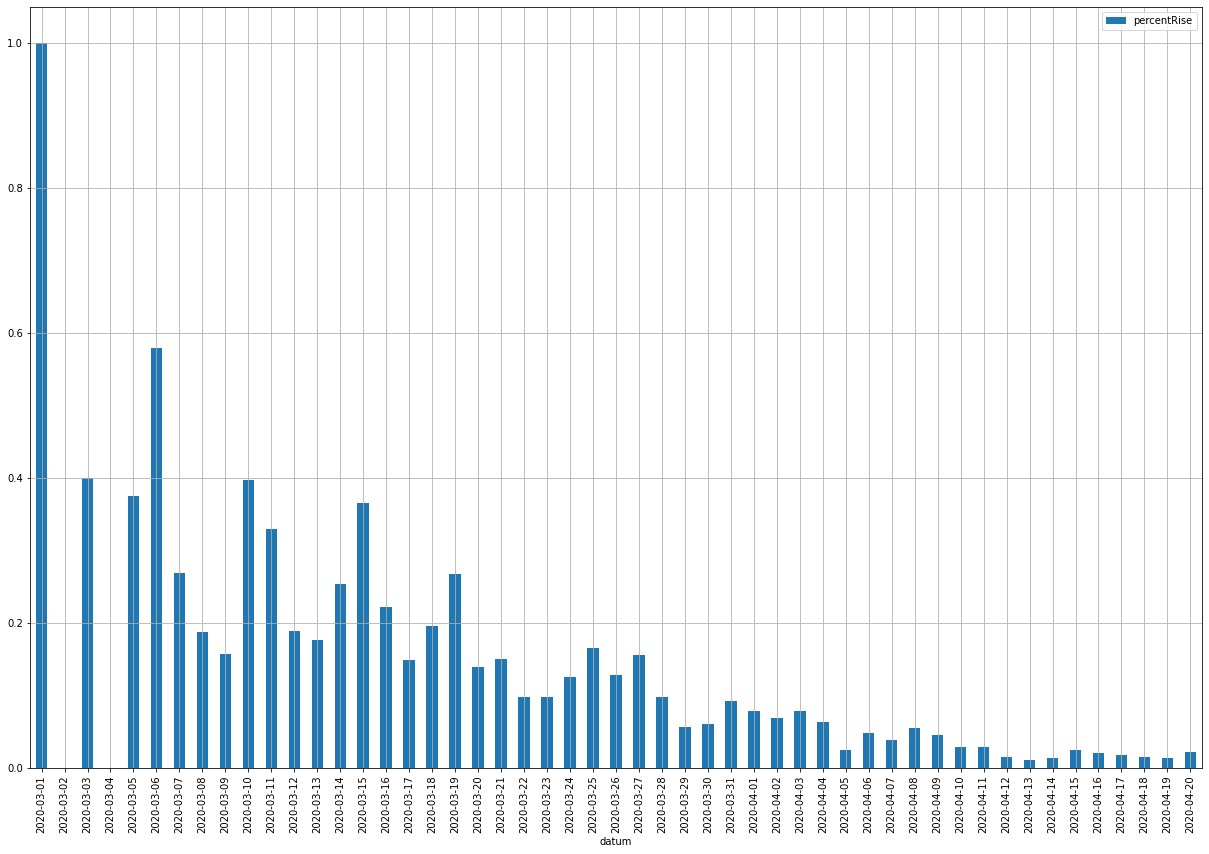

In [8]:
dfCumulative['percentRise'] = dfCumulative.pocetDen /dfCumulative.pocetCelkem
dfCumulative[dfCumulative['pocetCelkem'] > 0].plot(kind='bar',x='datum',y='percentRise')
plt.grid(which='both')
plt.show()

# Procento pozitivně testovaných denně a celkově

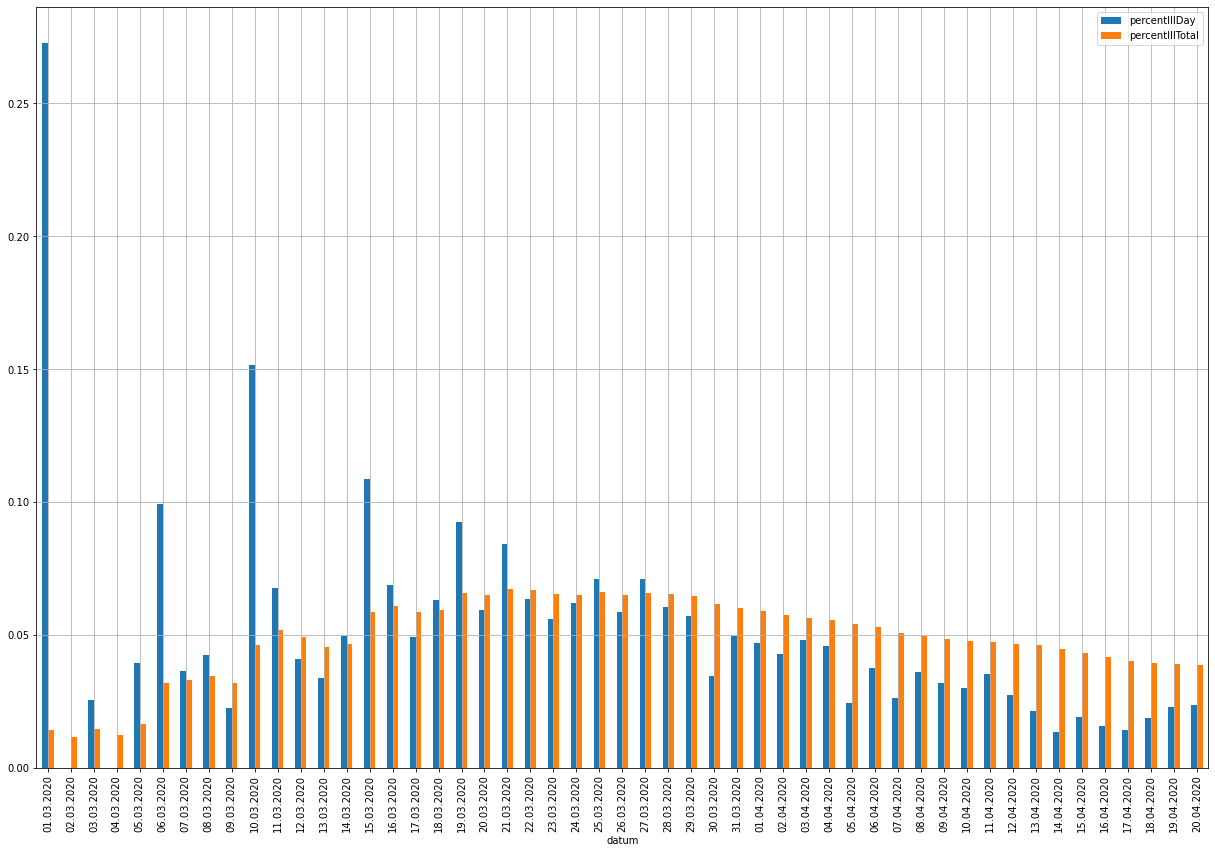

In [9]:

#display(dfTesty)
#display(dfCumulative)
#display(dfHlaseni)
#df = dfTesty.join(dfCumulative.set_index('datum'), on='Col3')
pd.set_option('display.max_rows', None)
dfNew =  dfTesty.set_index('datum_int').join(dfCumulative.set_index('datum'))
dfNew['percentIllDay'] = dfNew.pocetDen /dfNew['testy-den']
dfNew['percentIllTotal'] = dfNew.pocetCelkem /dfNew['testy-celkem']
#display(dfNew[dfNew['pocetCelkem'] > 0])
#display(dfNew[dfNew['celkem'] > 211])
#display(dfNew[dfNew['datum_int'] > '2020-03-00'])
dfNew[dfNew['pocetCelkem'] > 0].plot(kind='bar',x='datum',y=['percentIllDay', 'percentIllTotal'])
plt.grid(which='both')
plt.show()

# Vývoj počtu nakažených a testovaných

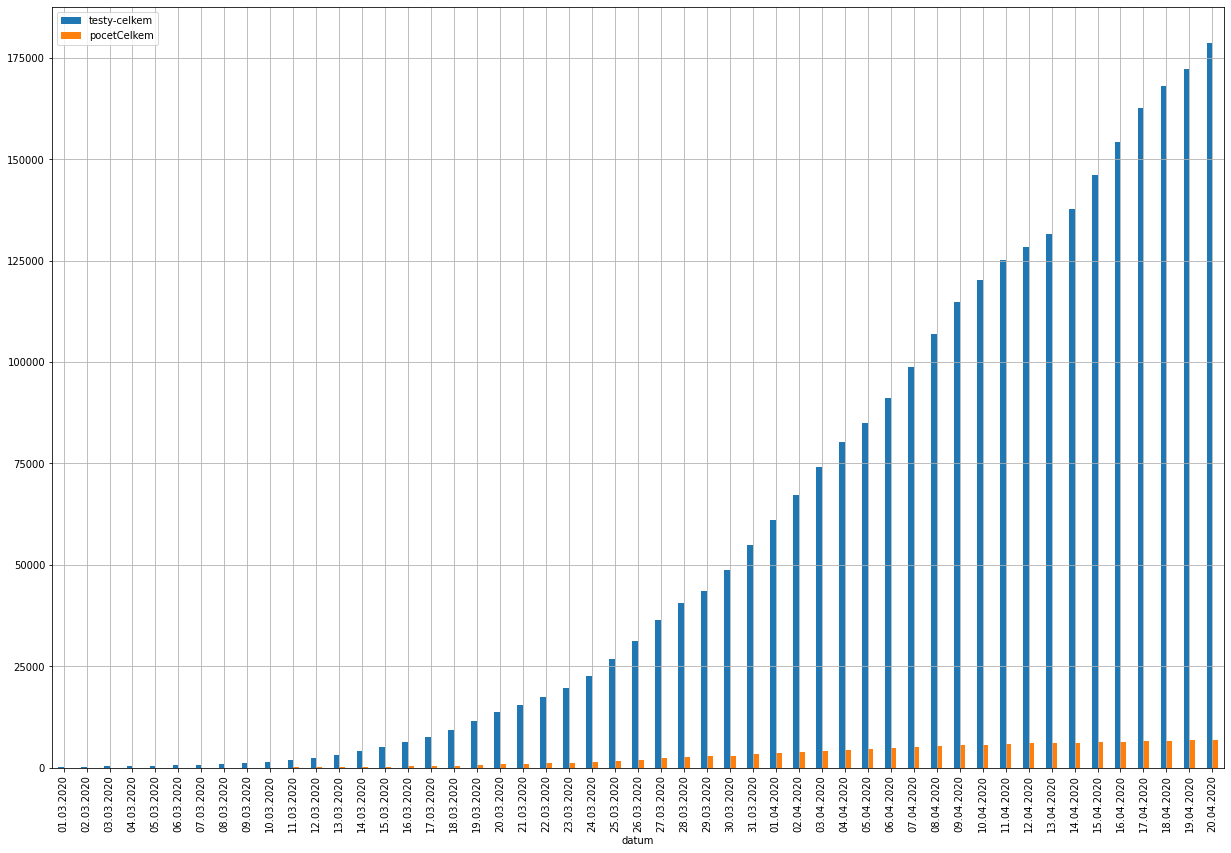

In [10]:
dfNew[dfNew['pocetCelkem'] > 0].plot(kind='bar',x='datum',y=['testy-celkem', 'pocetCelkem'])
plt.grid(which='both')
plt.show()


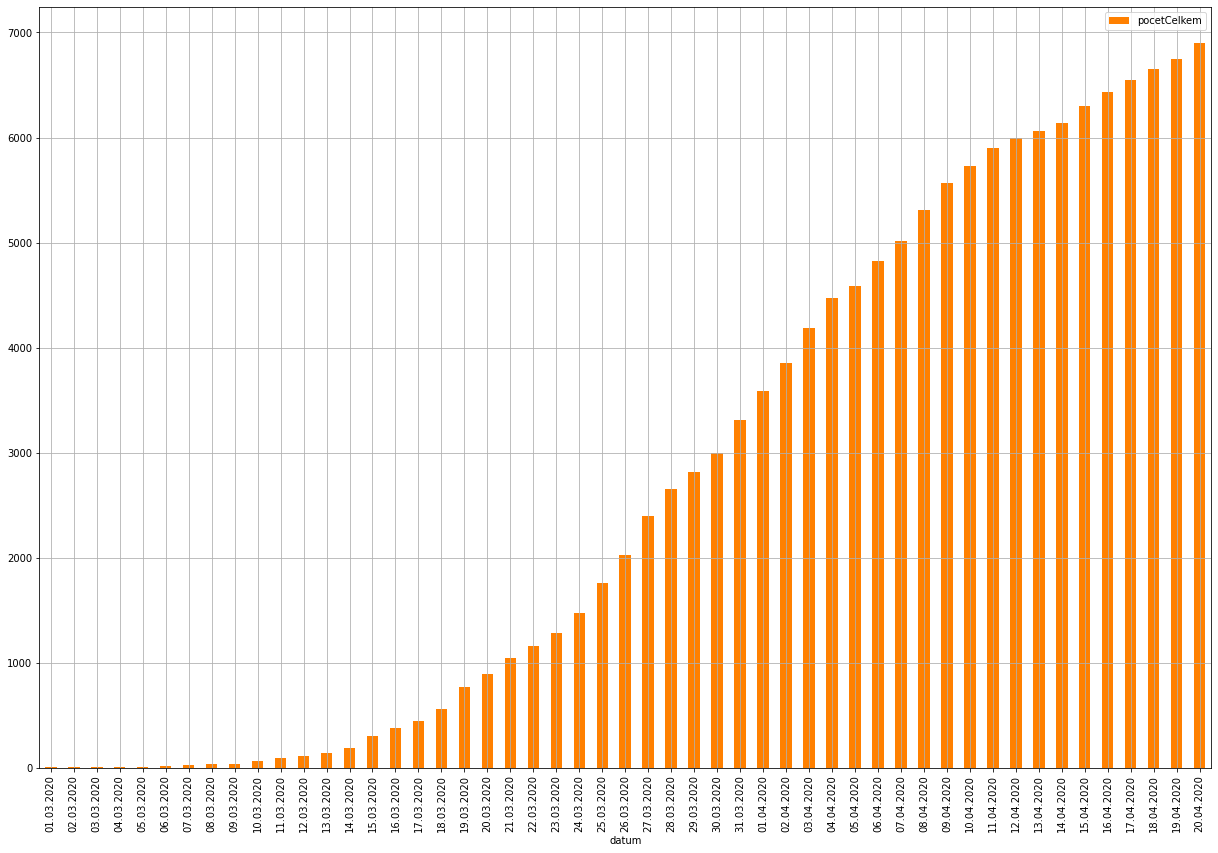

In [11]:
dfNew[dfNew['pocetCelkem'] > 0].plot(kind='bar',x='datum',y=['pocetCelkem'], color = '#ff8000')
plt.grid(which='both')
plt.show()

# Celkový vývoj počtu nakažených

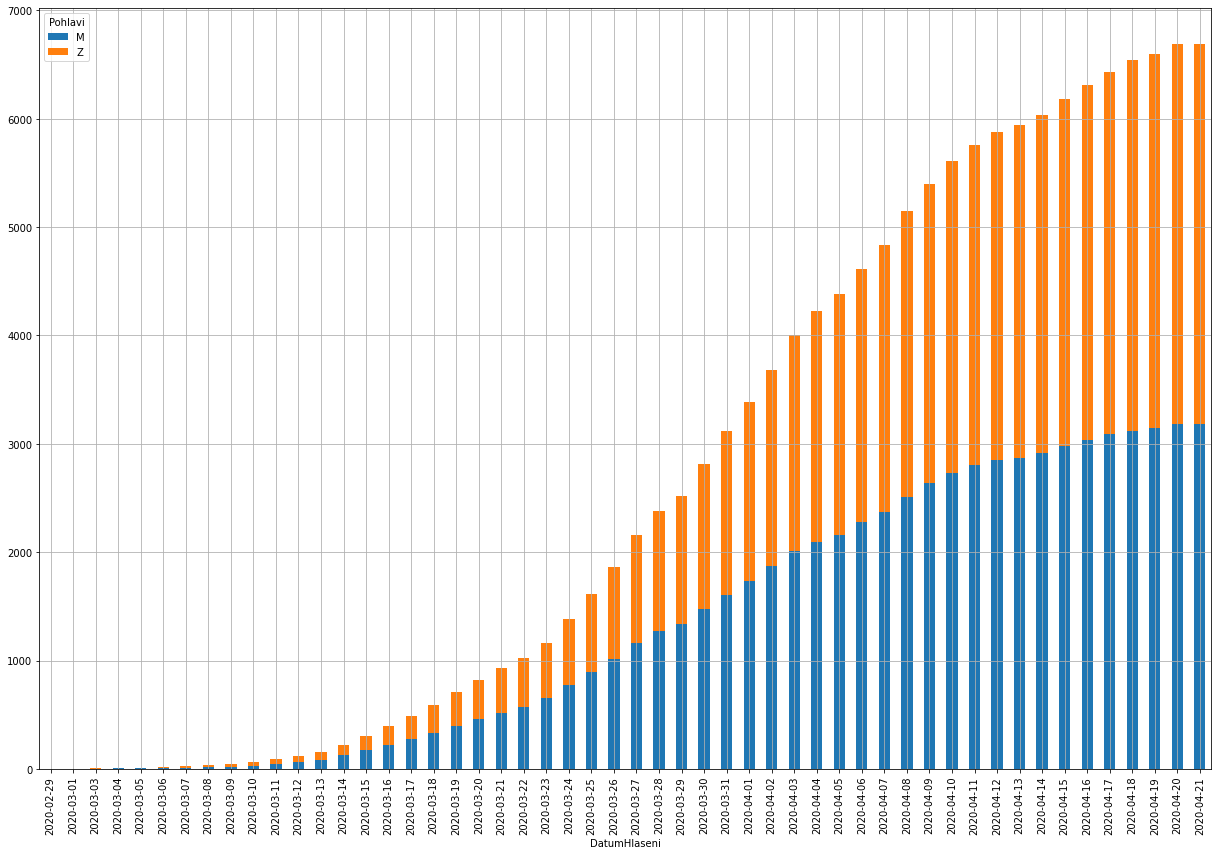

In [12]:
dfHlaseni.groupby(['DatumHlaseni','Pohlavi']).size().groupby('Pohlavi').cumsum().unstack().plot(kind='bar',stacked=True)
plt.grid(which='both')
plt.show()